# Import Libraries

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Loading the Data and Initial preprocessing

In [2]:
df=pd.read_csv("SeoulBikeData.csv")
print(df.info()) # There are 8760 instances in the dataset
print(df.describe()) # describe() shows the summary of the numerical attributes
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday,Yes


### Initial Visualisation

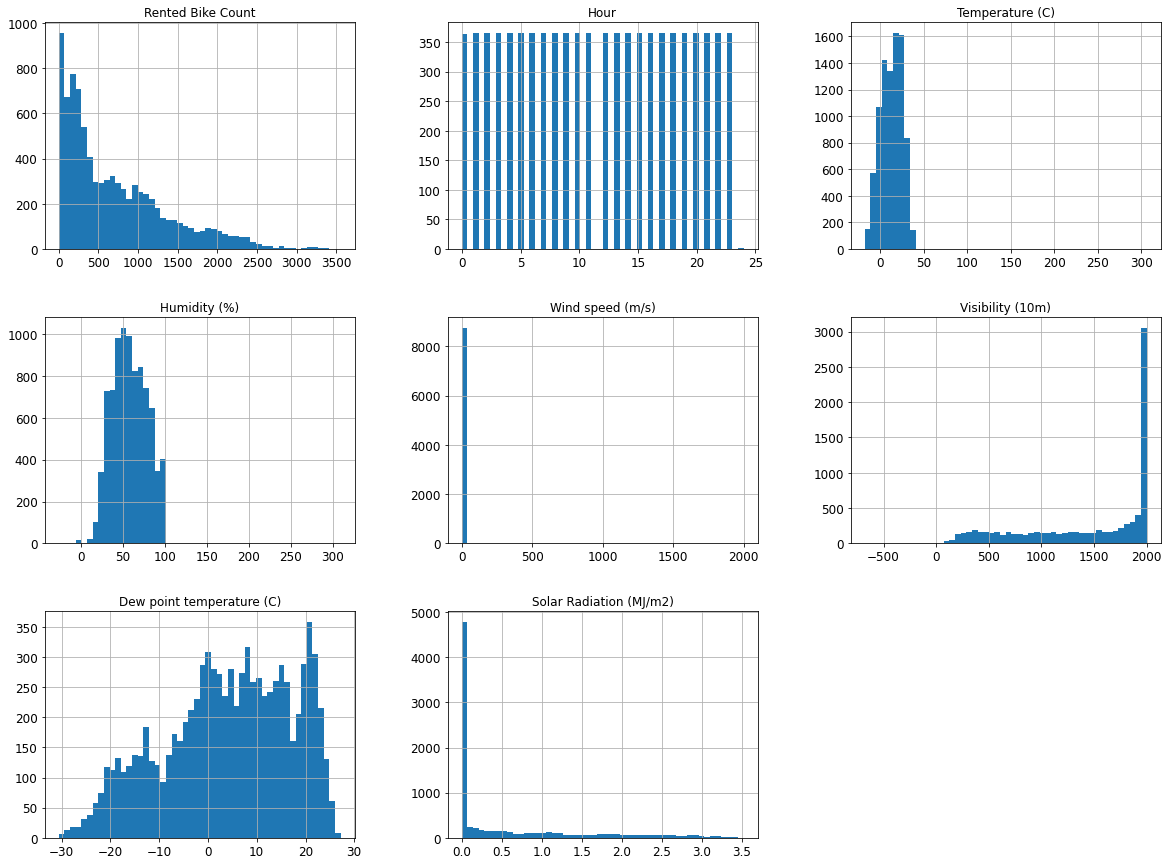

In [3]:
df.hist(bins=50,figsize=(20,15))
plt.show()

### Removing undesired information

The feature 'Functioning Day' tells us if the business was open on that day. Here we are only interseted in the demands. So we'll remove the rows when business was closed.

In [4]:
# Sanity check to ensure that these rows contains Zero Bike Rentals
df_a=df.loc[df["Functioning Day"]=="No"]
df_b=df_a["Rented Bike Count"]
# print(df_b.values)
for i in df_b:
    if i!=0:
        print("Rented Bike count is not always zero")
        break
    else:
        pass
# Instead of removing the rows containing Zero Bike Rentals I am only selecting the rows which does not have zero bike rentals.
df1=df.loc[df["Functioning Day"]=="Yes"]
df1=df1.drop("Functioning Day",axis=1)
df1.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday


### Numerical encoding

Machine Learning algorithm wors only on humbers. So lets convert the non features to numeric ones.
if holiday then 1 else 0

In [5]:
# There are many methods to do that. We can either use pands.Categorical(value).codes or we can use if else condition for that.

# Method 1
# df1[['Holiday']] = df1[['Holiday']].apply(lambda holiday_column:pd.Categorical(holiday_column).codes)
# df1 # no holiday is 1 & holiday is 0  
# Also now Holiday column is converted to int from object
# df1.head()

# Method 2
df1["Holiday"]=df1["Holiday"].apply(lambda col_val:1 if (col_val=="Holiday") else 0)
df1.head()
# Also now Holiday column is converted to int from object

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,0


Giving neumerical values to the 'season' features.
for example: creating 4 more columns for the features and assigning values 0 or 1 to them.
spring contains 1 if its spring season and 0 elsewhere

In [6]:
df1["Winter"]=np.where(df1["Seasons"]=="Winter",1,0)
df1["Autumn"]=np.where(df1["Seasons"]=="Autumn",1,0)
df1["Spring"]=np.where(df1["Seasons"]=="Spring",1,0)
df1["Summer"]=np.where(df1["Seasons"]=="Summer",1,0)
df1.drop('Seasons', axis=1, inplace=True)

### Replace the 'Date' feature with 0 or 1, depending on if its a weekday or weekend.

In [7]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

# code to apply the function here:
df1["Weekday"]=df["Date"].transform(date_is_weekday)
df1.drop('Date', axis=1, inplace=True)
df1

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Autumn,Spring,Summer,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,1,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,1,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,1,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,0,0,1,0,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,0,0,1,0,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,0,0,1,0,0,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,0,0,1,0,0,1


Convert all non numeric data to numeric.
Set any non numeric value to NaN

In [8]:
print("NaN before converting the data to numerical format")
print (df1.isnull().sum())
print()
# we are gonna write a function that will return true if the parameter of the function can be converted to float.
def numeric(val):
    try:
        float(val)
        return True
    except:
        return False

df2=df1[df1.applymap(numeric)] 
# we are using applymap function to apply func. numeric(val) to dataframe elementwise. applymap will assign NaN to non numeric data.




df2[["Rainfall(mm)", "Snowfall (cm)"]] = df2[["Rainfall(mm)", "Snowfall (cm)"]].apply(pd.to_numeric)  # converting snowfall and rainfall columns Dtype from object to float
print("NaN after converting the data to numerical format\n")
print (df2.isnull().sum())
print(df2.info())

NaN before converting the data to numerical format
Rented Bike Count            0
Hour                         0
Temperature (C)              0
Humidity (%)                 0
Wind speed (m/s)             1
Visibility (10m)             0
Dew point temperature (C)    1
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 2
Snowfall (cm)                0
Holiday                      0
Winter                       0
Autumn                       0
Spring                       0
Summer                       0
Weekday                      0
dtype: int64

NaN after converting the data to numerical format

Rented Bike Count             0
Hour                          0
Temperature (C)               0
Humidity (%)                  0
Wind speed (m/s)              1
Visibility (10m)              0
Dew point temperature (C)     1
Solar Radiation (MJ/m2)       0
Rainfall(mm)                 25
Snowfall (cm)                23
Holiday                       0
Winter                        0
Autu

## Visualising the data and performing further processing

**Plot to show problametic values**

First Visualisation of problamatic entries 
Rented Bike Count: [   2    2    2 ... 3404 3418 3556]


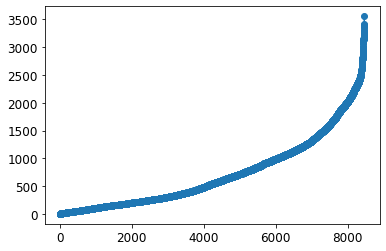

Hour: [ 0  0  0 ... 23 23 24]


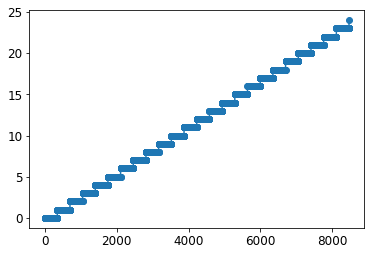

Temperature (C): [-17.8 -17.5 -17.5 ...  39.3  39.4 306. ]


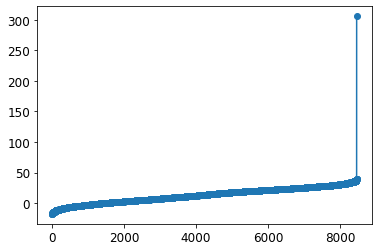

Humidity (%): [-26 -24 -24 ...  98  98 309]


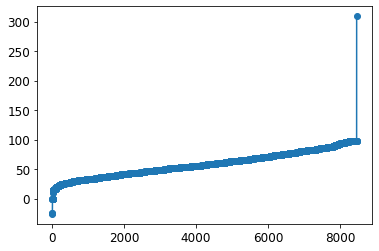

Wind speed (m/s): [   0.     0.     0.  ...    7.4 2000.     nan]


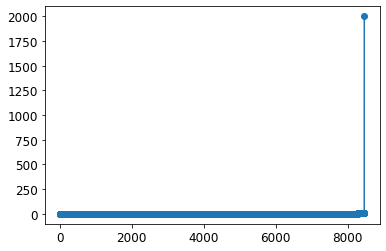

Visibility (10m): [-678    1   27 ... 2000 2000 2000]


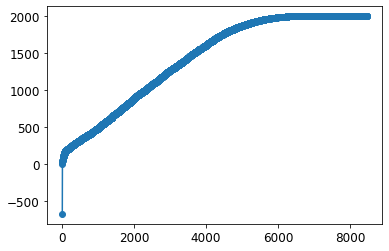

Dew point temperature (C): [-30.6 -30.5 -29.8 ...  26.8  27.2   nan]


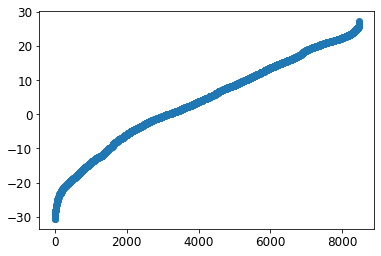

Solar Radiation (MJ/m2): [0.   0.   0.   ... 3.49 3.52 3.52]


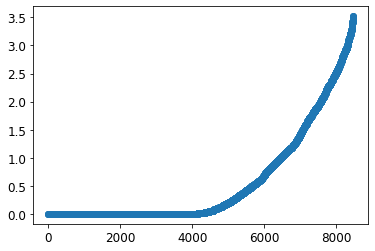

Rainfall(mm): [ 0.  0.  0. ... nan nan nan]


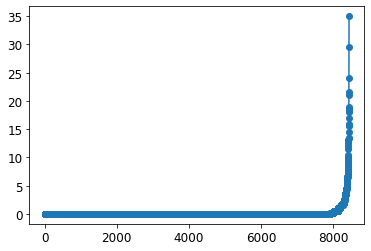

Snowfall (cm): [ 0.  0.  0. ... nan nan nan]


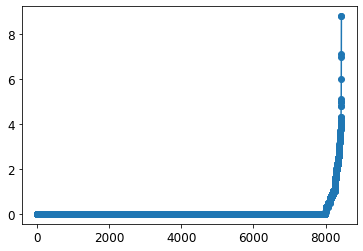

Holiday: [0 0 0 ... 1 1 1]


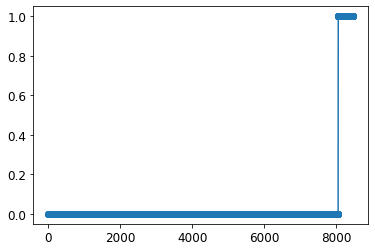

Winter: [0 0 0 ... 1 1 1]


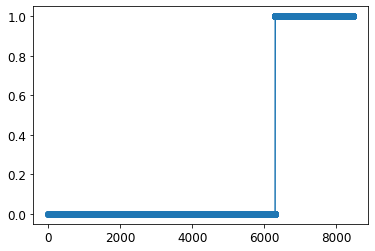

Autumn: [0 0 0 ... 1 1 1]


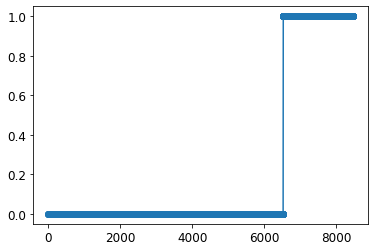

Spring: [0 0 0 ... 1 1 1]


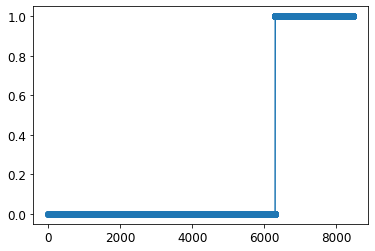

Summer: [0 0 0 ... 1 1 1]


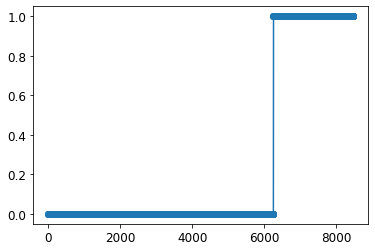

Weekday: [0 0 0 ... 1 1 1]


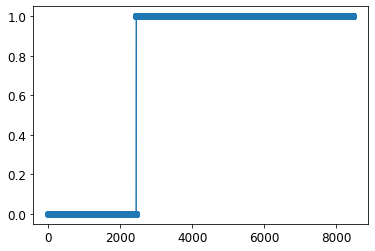

Second Visualisation of problamatic entries


Rented Bike Count               AxesSubplot(0.125,0.536818;0.0824468x0.343182)
Hour                         AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
Temperature (C)              AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
Humidity (%)                 AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
Wind speed (m/s)             AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
Visibility (10m)             AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
Dew point temperature (C)    AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
Solar Radiation (MJ/m2)      AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
Rainfall(mm)                       AxesSubplot(0.125,0.125;0.0824468x0.343182)
Snowfall (cm)                   AxesSubplot(0.223936,0.125;0.0824468x0.343182)
Holiday                         AxesSubplot(0.322872,0.125;0.0824468x0.343182)
Winter                          AxesSubplot(0.421809,0.125;0.0824468x0.343182)
Autumn                          AxesSubplot(0.520745

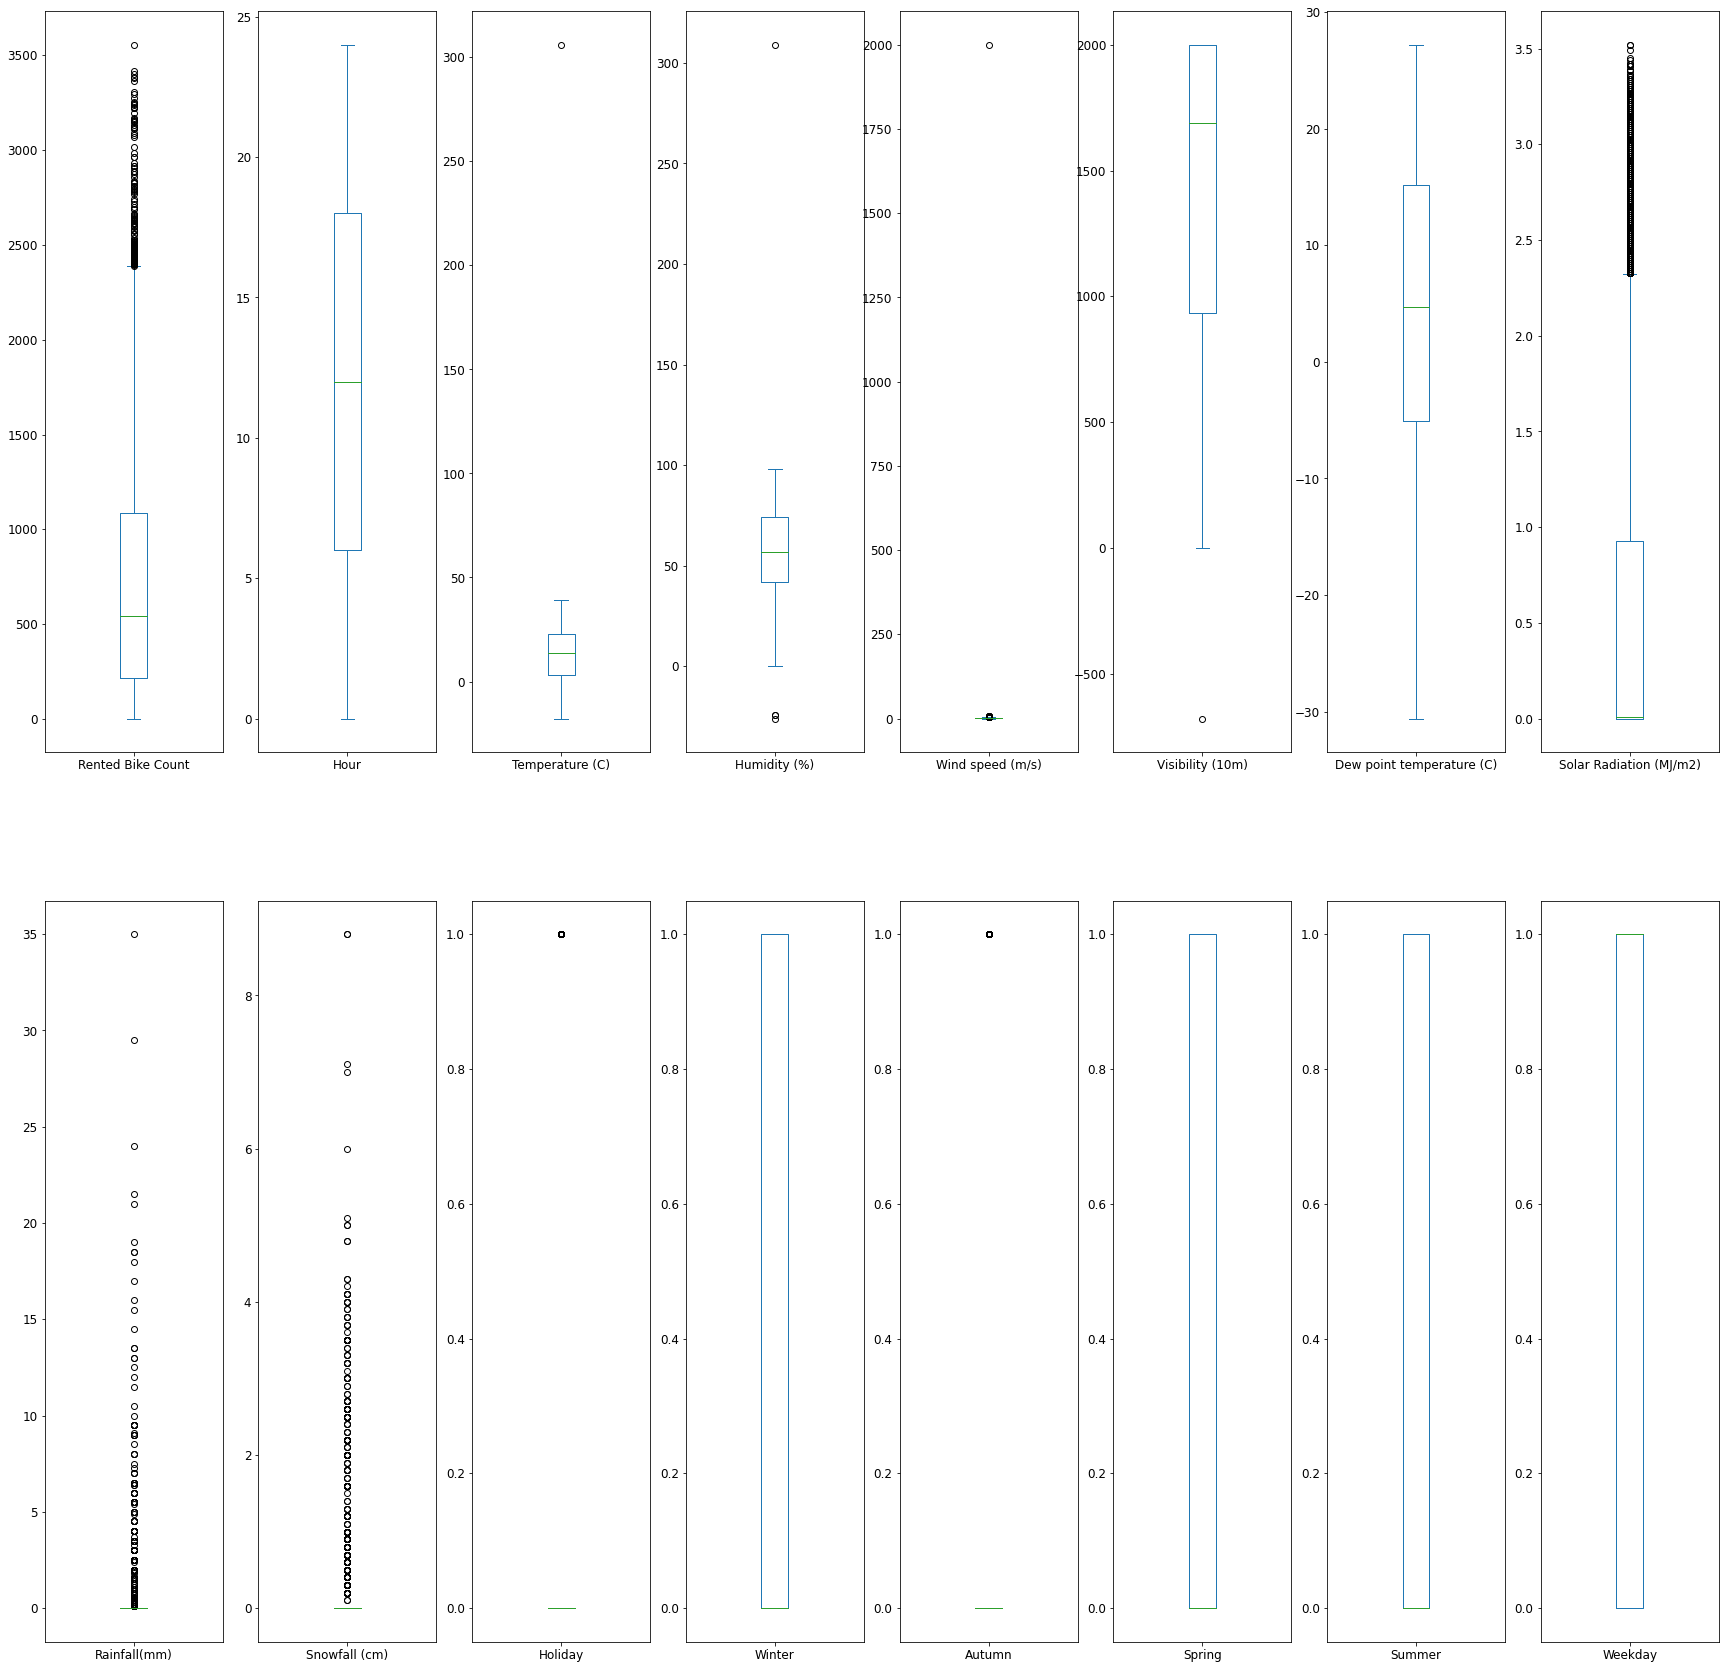

In [9]:
print("First Visualisation of problamatic entries ")
for n in range(df2.shape[1]):
    print(f'{df2.columns[n]}: {np.sort(df2.iloc[:,n])}')  # sorting the values for Visualisation
    plt.plot(np.sort(df2.iloc[:,n]),'-o')
    plt.show()

print("Second Visualisation of problamatic entries")
df2.plot(kind="box", subplots=True,figsize=(30,30),layout=(2,8))  # boxplot 

### Summar about problematic entries
As the word describes problematic values are the values that can be a problem for the machine.
we know for machine learning algorithms to works, it requires a numeric data. So that it can apply some
mathematical concept to make a prediction.

The problematic entries include non numeric values like "No value","###","*" or the values that are too high or too low etc.


### 2.2 Imputation and Pre-Processing

Set any problametic values to NaN.
Using Pipeline to perform imputation with median 

**Just specify the pipeline - do not run it now.**

In [10]:
print(df2.describe())
"""From here we can see that in temperature column the maximum value is 306, so this is a problematic entry"""
# Similarily we have problematic entries in other columns as well, so we set then to np.nan
df2.loc[(df2['Temperature (C)'] < -5),'Temperature (C)'] = np.nan
df2.loc[(df2['Temperature (C)'] > 45),'Temperature (C)'] = np.nan
df2.loc[(df2['Humidity (%)'] < 0),'Humidity (%)'] = np.nan
df2.loc[(df2['Humidity (%)'] > 100),'Humidity (%)'] = np.nan
df2.loc[(df2['Visibility (10m)'] <0),'Visibility (10m)'] = np.nan
df2.loc[(df2['Wind speed (m/s)'] >5),'Wind speed (m/s)'] = np.nan


print(df2.describe())  # to check if it has worked
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# pre_pipeline=Pipeline([('imputer', SimpleImputer(strategy="median"))])

# pre_pipeline=Pipeline([
#     ("imputer", SimpleImputer(strategy="median")),
#     ("std_scaler", StandardScaler()),
# ])

# pre_pipeline=Pipeline([
#     ("imputer",SimpleImputer()),
#     ("min_max", MinMaxScaler()),
# ])






# MinMax Scaler is sensitive to outliers and we have removed outliers from the data but we did not removed the 
# the outliers from the target column that is the 'Bike Rented Count' and as we know that in that column
# there are outliers as we checked by using the describe() in the first step of the assignment.
# MinMax get seriously affected by the outliers so I don't think that we should use MinMax here.

# we use Standard Scaler when our features follow normmal distribution but not all our features follow normal
# distribution also we our RMSE values doesn't look good if we compare to MinMax & Robust Sclaing

# when I tried Robust Scaling , it works pretty well in all the models and also get less value for RMSE.
# The centering and scaling statistics of Robust scaler are based on percentiles and are 
# therefore not influenced by large marginal outliers. So I think that this should be fine.

pre_pipeline=Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("robust", RobustScaler()),
])

       Rented Bike Count         Hour  Temperature (C)  Humidity (%)  \
count        8465.000000  8465.000000      8465.000000   8465.000000   
mean          729.156999    11.509864        12.803591     58.161607   
std           642.351166     6.921101        12.515429     20.713601   
min             2.000000     0.000000       -17.800000    -26.000000   
25%           214.000000     6.000000         3.000000     42.000000   
50%           542.000000    12.000000        13.500000     57.000000   
75%          1084.000000    18.000000        22.700000     74.000000   
max          3556.000000    24.000000       306.000000    309.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  \
count       8464.000000       8465.000000                8464.000000   
mean           1.962169       1433.477141                   3.945558   
std           21.744979        609.596083                  13.243081   
min            0.000000       -678.000000                 -30.6

### 2.3 Correlation 

Before anything else is done it is necessary to **fit and apply the pipeline** above to make a *temporary* version of the whole dataset that is pre-processed. 
**Why is it important to not use this version of the pre-processed data again?**

In [12]:
pre_pipeline_prepared=pre_pipeline.fit_transform(df2) # using fit_transform on the pipeline specified above
# print(pre_pipeline_prepared)

pre_pipeline_final=pd.DataFrame(pre_pipeline_prepared,columns=df2.columns,index=df2.index)# changing to dataframe 

# pre_pipeline_final   # we are not using this dataframe anywhere in the code

### Answer to the question above
We should not use this version of the pre-processed data again because we have taken care of all the bad values like problematic values ,nan, etc. Why would we want to run it again. 
Also later in the project we are building a new pipeline which includes this pipeline, so when we fit and apply the later pipeline this pipeline works automatically.
And now as we created a temporary version of the dataset in which we have the clean data.


Also MOST IMPORTANTLY this version contains testing labels too and we do not want to include testing labels.
We do not want to include testing labels for training the data

scatter plot to visualise the strength of the relationships, each feature vs the target feature. 
Correlation of each feature with the target

The correlation between them
Rented Bike Count            1.000000
Temperature (C)              0.520106
Hour                         0.425460
Dew point temperature (C)    0.400248
Summer                       0.282001
Solar Radiation (MJ/m2)      0.273862
Visibility (10m)             0.210968
Autumn                       0.165333
Wind speed (m/s)             0.132424
Weekday                      0.046360
Spring                       0.015580
Holiday                     -0.070070
Rainfall(mm)                -0.129170
Snowfall (cm)               -0.152261
Humidity (%)                -0.201755
Winter                      -0.458920
Name: Rented Bike Count, dtype: float64
Now lets see the scatterplot to visualize strength


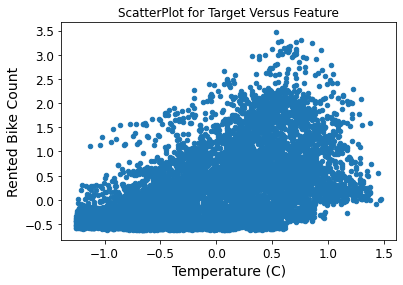

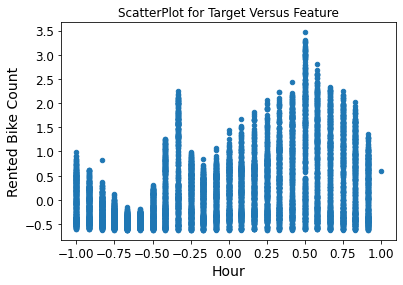

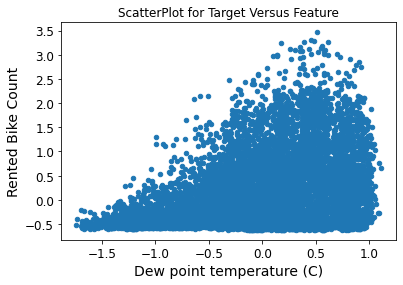

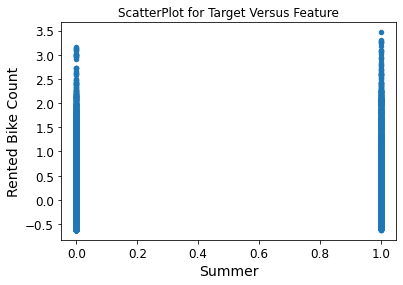

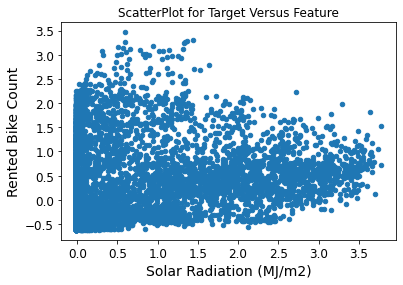

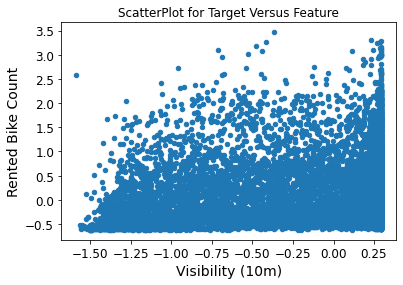

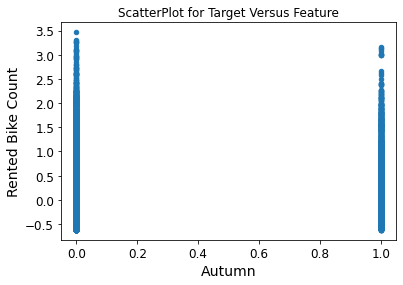

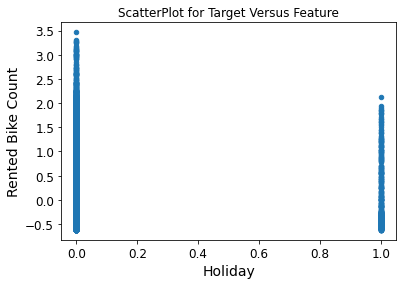

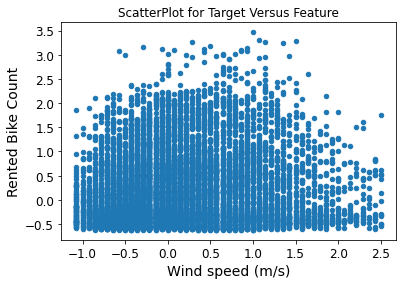

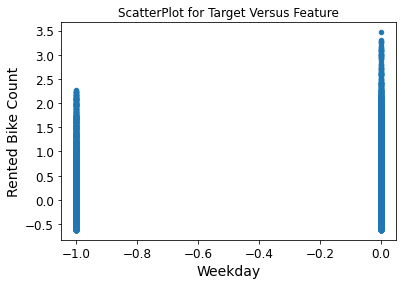

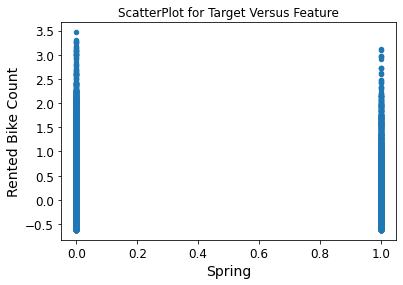

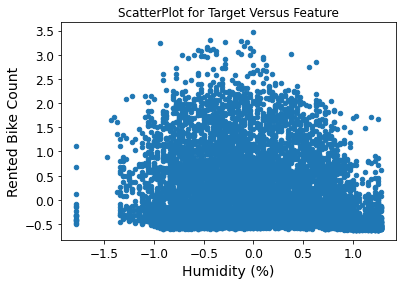

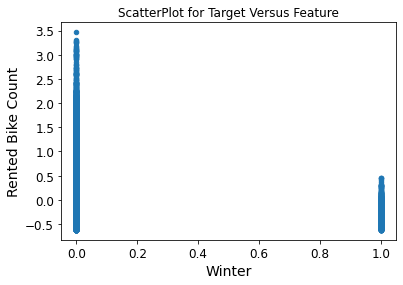

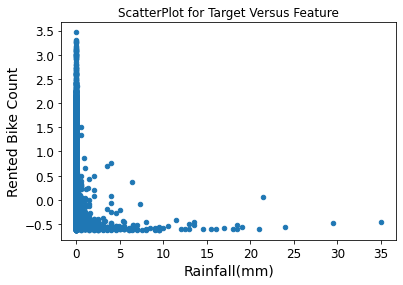

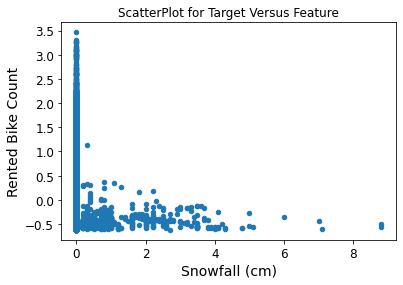

In [14]:
print("The correlation between them")
corr_matrix=df2.corr()
print(corr_matrix["Rented Bike Count"].sort_values(ascending=False))


print("Now lets see the scatterplot to visualize strength")
attr=["Temperature (C)","Hour","Dew point temperature (C)","Summer","Solar Radiation (MJ/m2)","Visibility (10m)","Autumn",
"Holiday","Wind speed (m/s)","Weekday","Spring","Humidity (%)","Winter","Rainfall(mm)","Snowfall (cm)"]
for i in attr:
    pre_pipeline_final.plot(kind="scatter",x=i,y="Rented Bike Count")
    plt.title("ScatterPlot for Target Versus Feature")

### Your written answers here
When correlation coefficient is close to 1: Strong Positive Correlation and if -1 : String Negative Correlation.         

Here 3 most correlated attributes are-
1. Temperature (C)              (Positive correlation)
2. Winter                       (negative correlation)
3. Hour                         (Positive correlation)

## Predicting bike rentals

Linear Regression model will be used.
RMSE will be taken into account to quantify performance.
For baseline RMSE will be calculated if all the predictions were equal to the mean of training labels.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_set, test_set = train_test_split(df2, test_size=0.2, random_state=42)

training_features = train_set.drop(["Rented Bike Count"], axis=1)
training_labels = train_set["Rented Bike Count"].copy()
testing_features=test_set.drop(["Rented Bike Count"],axis=1)
testing_label=test_set["Rented Bike Count"].copy()

# now lets build a pipeline
full_pipeline=Pipeline([
    ('pipeline', pre_pipeline),
    ('lr',LinearRegression())

])

# fit and predict
model=full_pipeline.fit(training_features,training_labels)
# print(model)
full_pipeline_pred= model.predict(training_features)

# calculating RMSE of the full_pipeline_pred vs training labels

mse=mean_squared_error(full_pipeline_pred,training_labels)
rmse=np.sqrt(mse)
print("RMSE of the fit of the training data: ",rmse)

# baseline for comparision
# print(len(training_labels), training_labels.mean())
list1=[]
length=training_labels
for i in length:
    list1.append(i)
training_labels_mean = pd.Series(training_labels.mean(), index =list1)
training_labels_mean
rmse_=np.sqrt(mean_squared_error(training_labels_mean,training_labels))
print("The RMSE if all the predictions were equal to the mean of the training targets: ",rmse_)

RMSE of the fit of the training data:  436.44185800897606
The RMSE if all the predictions were equal to the mean of the training targets:  646.170499547999


Visualisation of the fit for your linear regression.

Text(0.5, 1.0, 'Visualisation of Linear Regression')

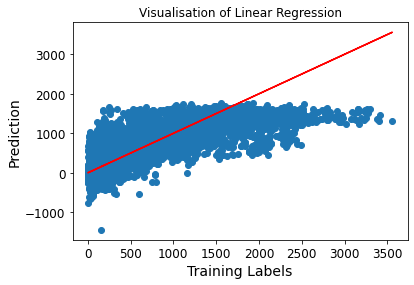

In [16]:
plt.scatter(training_labels,full_pipeline_pred)
plt.plot(training_labels,training_labels, "r")
plt.xlabel("Training Labels")
plt.ylabel("Prediction")
plt.title("Visualisation of Linear Regression")

Lets expore some other regression models:
Kernel Ridge and Support Vector regression

RMSE of the fit of the training data:  436.3404710170058


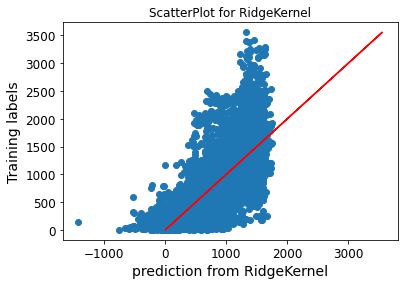

In [17]:
from sklearn.kernel_ridge import KernelRidge
pipeline_ridge=Pipeline([
    ('pipeline', pre_pipeline),
    ("krr",KernelRidge())
])
model_krr=pipeline_ridge.fit(training_features,training_labels)
pipeline_ridge_pred= model_krr.predict(training_features)

# Here it says to display RMSE for the training data

mse_krr=mean_squared_error(pipeline_ridge_pred,training_labels)
rmse_krr=np.sqrt(mse_krr)
print("RMSE of the fit of the training data: ",rmse_krr)

# plot the fit
plt.xlabel("prediction from RidgeKernel")
plt.ylabel("Training labels")
plt.title("ScatterPlot for RidgeKernel")

plt.scatter(pipeline_ridge_pred,training_labels)
plt.plot(training_labels,training_labels,"r")

Support Vector Regression

RMSE of the fit of the training data:  527.2154766690323


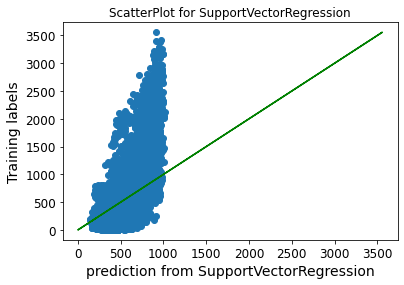

In [18]:
from sklearn.svm import SVR
pipeline_svr=Pipeline([
    ('pipeline', pre_pipeline),
    ("svr",SVR())
])
model_svr=pipeline_svr.fit(training_features,training_labels)
pipeline_svr_pred= model_svr.predict(training_features)

mse_svr=mean_squared_error(pipeline_svr_pred,training_labels)
rmse_svr=np.sqrt(mse_svr)
print("RMSE of the fit of the training data: ",rmse_svr)

# plotting the fit
plt.xlabel("prediction from SupportVectorRegression")
plt.ylabel("Training labels")
plt.title("ScatterPlot for SupportVectorRegression")

plt.scatter(pipeline_svr_pred,training_labels)
plt.plot(training_labels,training_labels,"g")

## Cross validation
10K cross  validation for each model.

In [19]:

# cross_val_score returns an array of scores of the estimator for each run of the cross validation.
# cross_validate returns A dict of arrays containing the score/time arrays for each scorer is returned.
# so thats why we will use cross_validate instead of cross_val_score

from sklearn.model_selection import cross_validate
print("For Linear Regression")
lin_reg_scores=cross_validate(full_pipeline,training_features,training_labels, scoring="neg_root_mean_squared_error",
                             cv=10,return_train_score=True)
print("Mean & Standard Deviation for validation split")

print("The Mean is: ",np.mean(-lin_reg_scores['test_score']))
print("The Standard Deviation is: ",np.std(-lin_reg_scores['test_score']))
print()
print('Mean & Standard Deviation for training split')
print("The Mean for training data split is :",np.mean(-lin_reg_scores['train_score']))
print("The Standard Deviation for training data split is :",np.std(-lin_reg_scores['train_score']))

print("\n\n")
print("For KernelRidge")
krr_score=cross_validate(pipeline_ridge,training_features,training_labels, scoring="neg_root_mean_squared_error",
                             cv=10,return_train_score=True)

print("Mean & Standard Deviation for validation split")

print("The Mean is: ",np.mean(-krr_score['test_score']))
print("The Standard Deviation is: ",np.std(-krr_score['test_score']))
print()
print('Mean & Standard Deviation for training split')
print("The Mean for training data split is :",np.mean(-krr_score['train_score']))
print("The Standard Deviation for training data split is :",np.std(-krr_score['train_score']))

print("\n\n")
print("For Support Vector Regression")
svr_score=cross_validate(pipeline_svr,training_features,training_labels, scoring="neg_root_mean_squared_error",
                             cv=10,return_train_score=True)

print("Mean & Standard Deviation for validation split")

print("The Mean is: ",np.mean(-svr_score['test_score']))
print("The Standard Deviation is: ",np.std(-svr_score['test_score']))
print()
print('Mean & Standard Deviation for training split')
print("The Mean for training data split is :",np.mean(-svr_score['train_score']))
print("The Standard Deviation for training data split is :",np.std(-svr_score['train_score']))

For Linear Regression
Mean & Standard Deviation for validation split
The Mean is:  437.31031698739434
The Standard Deviation is:  16.378353852767294

Mean & Standard Deviation for training split
The Mean for training data split is : 436.27892914142495
The Standard Deviation for training data split is : 1.829399511568779



For KernelRidge
Mean & Standard Deviation for validation split
The Mean is:  437.3325326859763
The Standard Deviation is:  16.382901582454448

Mean & Standard Deviation for training split
The Mean for training data split is : 436.27022843985907
The Standard Deviation for training data split is : 1.8287339417216733



For Support Vector Regression
Mean & Standard Deviation for validation split
The Mean is:  536.7566147607497
The Standard Deviation is:  20.18951938959882

Mean & Standard Deviation for training split
The Mean for training data split is : 536.8076701030561
The Standard Deviation for training data split is : 2.326779606335937


As we see that there is almost no difference between testing and validation set for all the three models.
So based on the given information we say that the models above are **neither underfitting nor overfitting**. 

Also we see that in SVR the RMSE and Standard Deviation is much higher that other two models.


If validation error is greater than test error that does not mean anything.
Low validation error and high test error means overfitting.


## Grid parameter search

For KernelRidge, vary the hyperparameter `alpha`.

For SVR, vary the hyperparameter `C`.


In [20]:
from sklearn.model_selection import GridSearchCV
param_grid=[{
    "krr__alpha":[0.1,1,10,100]
}]
gps_model=pipeline_ridge
grid_search=GridSearchCV(gps_model,param_grid,cv=10,
                        scoring="neg_mean_squared_error",
                        return_train_score=True)
grid_search.fit(training_features,training_labels)
print(grid_search.best_params_)


{'krr__alpha': 0.1}


In [21]:
# Now finally we make prediction on testing data

final_pipeline_ridge=Pipeline([
    ('pipeline', pre_pipeline),
    ("krr",KernelRidge(alpha=0.1))
])

final_model_krr=final_pipeline_ridge.fit(training_features,training_labels)
final_pipeline_ridge_pred= final_model_krr.predict(testing_features)
print(final_pipeline_ridge_pred)

# Calculate RMSE
mse_final=mean_squared_error(testing_label,final_pipeline_ridge_pred)
rmse_final=np.sqrt(mse_final)
print(rmse_final)

[1612.16589144 1087.22121079 1339.79528848 ...  366.9246641  1069.48252323
 1311.12947011]
415.7561426962496


Text(0, 0.5, 'Prediction')

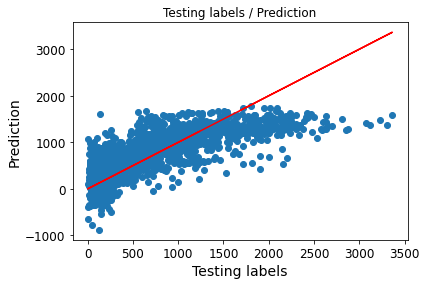

In [22]:
plt.scatter(testing_label,final_pipeline_ridge_pred,)
plt.plot(testing_label,testing_label,"r")
plt.title("Testing labels / Prediction")
plt.xlabel('Testing labels')
plt.ylabel('Prediction')



If validation error is greater than test error that does not mean anything.
low validation error and high test error means overfitting.

So in this case I would say that it is **neither overfitting nor underfitting**

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid=[{
    "svr__C":[1,10,100,1000]
}]
grid_model_svr=pipeline_svr
grid_search=GridSearchCV(grid_model_svr,param_grid,cv=10,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(training_features,training_labels)
print(grid_search.best_params_)

{'svr__C': 1000}


In [24]:
final_pipeline_svr=Pipeline([
    ('pipeline', pre_pipeline),
    ("svr",SVR(C=1000))
])


final_model_svr=final_pipeline_svr.fit(training_features,training_labels)
final_pipeline_svr_pred= final_model_svr.predict(testing_features)
print(final_pipeline_svr_pred)

# Calculate RMSE
mse_final=mean_squared_error(testing_label,final_pipeline_svr_pred)
rmse_final=np.sqrt(mse_final)
print(rmse_final)

[1234.50760592 1117.15244444 1371.22085897 ...   61.94766679 1119.27439578
 1436.80168355]
275.6683148638462


Text(0, 0.5, 'Prediction')

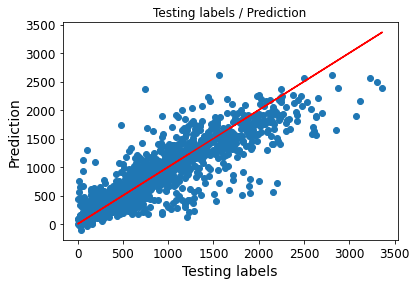

In [25]:
plt.scatter(testing_label,final_pipeline_svr_pred,)
plt.plot(testing_label,testing_label,"r")
plt.title("Testing labels / Prediction")
plt.xlabel('Testing labels')
plt.ylabel('Prediction')

If validation error is greater than test error that does not mean anything.
low validation error and high test error means overfitting.

So in this case i would say that it is neither overfitting nor underfitting